# Reseach Project

Implement CNN model to detect cell

## Load Image and generate DataSet 

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.pyplot import savefig
import numpy as np
from PIL import Image, ImageDraw
import math
import pylab
%matplotlib inline
from time import time
from sklearn.cross_validation import train_test_split
from sklearn import metrics
# from myipython import cnnModel

Entire image size: 
(1388, 1040)


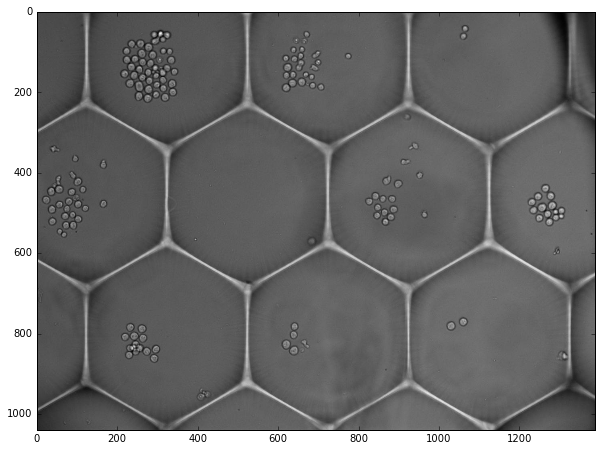

In [2]:
pylab.rcParams['figure.figsize'] = (10.0,10.0)

def loadEntireImage(entire_path):
    img = Image.open(entire_path,'r').convert("RGB")
    return img
      
entireImg = loadEntireImage('./data/train/entireImage/a1.jpeg')
print('Entire image size: ')
print(entireImg.size)
imshow(entireImg)

Well boundary
[722, 234, 1124, 703]
Well size:
(402, 469)


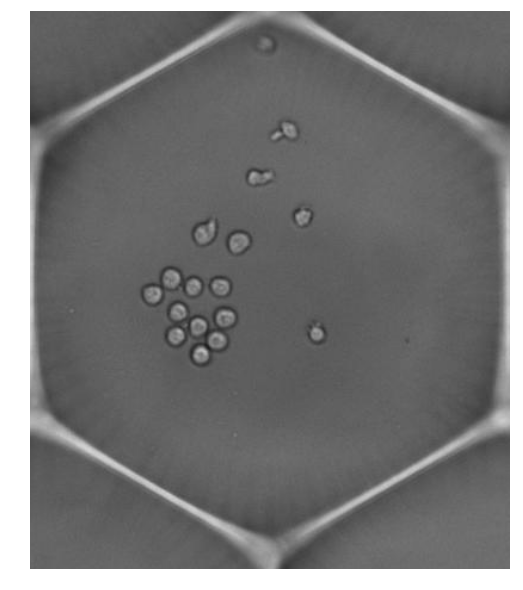

In [3]:
def loadBoundary(mat_path):
    boundary = sio.loadmat(mat_path)['mwBoundary'][0]
    a = boundary[2]
    b = boundary[0]
    c = boundary[3]
    d = boundary[1]
    return([a,b,c,d])


entireImg = loadEntireImage('./data/train/entireImage/a1.jpeg')
imshow(Image.new('L', [300,300], color=0))
boundary = loadBoundary('./data/train/boundry.mat')
well = entireImg.crop(boundary)


# savefig('./data/save/well.png')


wellfig = plt.imshow(well)
wellfig.set_cmap('hot')
plt.axis('off')
# wellfig = pylab.gcf()
plt.savefig('./data/save/well.png',bbox_inches='tight')
print('Well boundary')
print(boundary)
print('Well size:')
print(well.size)

sizeX = well.size[0]
sizeY = well.size[1]

[105.0, 119.0, 123.0, 125.0, 137.0, 141.0, 144.0, 148.0, 158.0, 160.0, 164.0, 175.0, 241.99999999999994, 230.99999999999994, 189.99999999999994, 219.99999999999994]
[239.0, 226.0, 273.0, 255.0, 232.0, 267.0, 288.0, 188.0, 276.0, 233.0, 258.0, 196.0, 276.0, 176.00000000000006, 142.00000000000006, 104.00000000000006]
There are 16 cells in total.


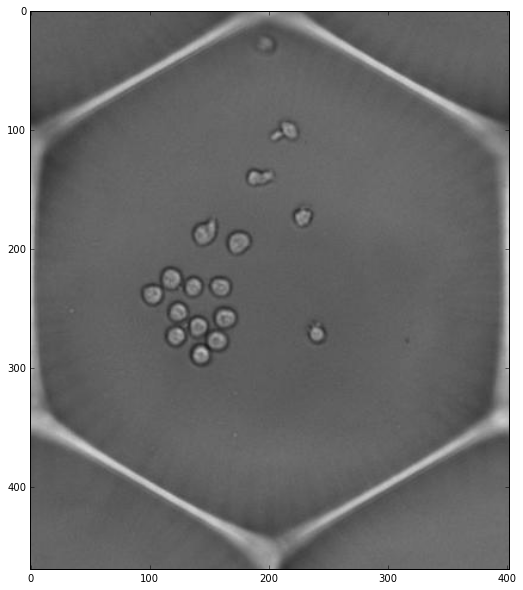

In [4]:
def loadCoordinate(filename,index):
    det = sio.loadmat(filename)
    table = det['detection'][0][index]
    arrayX = []
    arrayY = []
    for i in range(table.shape[0]):
        arrayX.append(table[i][0]-5)
        arrayY.append(table[i][1])
    return arrayX,arrayY
        

def printCoordinate(X,Y,img):
    draw = ImageDraw.Draw(img)
    for i in range(len(X)):
        draw.ellipse((X[i]-1,Y[i]-1,X[i]+1,Y[i]+1),fill = 'yellow', outline ='yellow')
    imgfig = plt.imshow(img)
    imgfig.set_cmap('hot')
    plt.axis('off')
    # wellfig = pylab.gcf()
    plt.savefig('./data/save/wellWithCoordinate.png',bbox_inches='tight')
    
X,Y = loadCoordinate('./data/train/det.mat',0)
print(X)
print(Y)
wellDraw = well
imshow(well)

print('There are '+str(len(X))+" cells in total.")

# printCoordinate(X,Y,wellDraw)



In [5]:
from numpy import random

def chooseRandomCrop(img,a,b):
    sizeX = img.size[0]
    sizeY = img.size[1]
    randomX = random.randint(0,sizeX-a)
    randomY = random.randint(0,sizeY-b)
    bound = [randomX,randomY,randomX+a,randomY+b]
    crop = img.crop(bound)
    return crop,bound


def rgbToInteger(r,g,b):
    return r*256*256+g*256+b

def countCell(coordinateName,bound,cellSize,index):
    count =0
    X,Y = loadCoordinate(coordinateName,index)
    for m in range(len(X)):
        if ((bound[0]+cellSize<X[m]) and (bound[2]-cellSize>X[m]) and (bound[1]+cellSize<Y[m]) and (bound[3]-cellSize>Y[m])):
            count = count+1
    return count
    
def generateTrainSetBalanced(entireImgPath,boundaryPath,coordinatePath,a,b,cellSize,numberEachImage,numberOfImage):
    
    boundary = loadBoundary(boundaryPath)  
    labelOneBoundList = []
    trainData = []
    trainLabelClassifier = []
    trainLabelCount=[]
    labelOneBoundList = []
    labelOneCountList = []
    halfNumber = math.floor(numberEachImage/2)
#     labelOneNum=0
#     labelZeroNum=0
    allBound = []
    
    
    for imageNumber in range(numberOfImage[0],numberOfImage[1]+1):
        entireImg = loadEntireImage(entireImgPath+str(imageNumber)+".jpeg")
        img = entireImg.crop(boundary)      
        labelOneNum=0
        labelZeroNum=0
        if(imageNumber%10==0):
            print(entireImgPath+str(imageNumber+1)+".jpeg")
        while(True):
            rgb=[]
            crop,bound = chooseRandomCrop(img,a,b)
            count = countCell(coordinatePath,bound,cellSize,imageNumber-1)
            for k in range(len(crop.getdata())):
                rgb.append(rgbToInteger(crop.getdata()[k][0],crop.getdata()[k][1],crop.getdata()[k][2]))  
            if(count>0 and labelOneNum<halfNumber):
                labelOneNum+=1
                label = 1             
                trainLabelClassifier.append(label)
                trainData.append(rgb)
                trainLabelCount.append(count)
                allBound.append(bound)
                labelOneCountList.append(count)
                labelOneBoundList.append(bound)
            elif(count==0 and labelZeroNum<halfNumber):
                labelZeroNum+=1
                label=0
                trainLabelClassifier.append(label)
                trainData.append(rgb)
                trainLabelCount.append(count)   
                allBound.append(bound)
            elif(labelOneNum==halfNumber and labelZeroNum==halfNumber):
                break
            
    print("Generate balanced train set.")
    print(str(len(labelOneCountList))+" in "+str((numberOfImage[1]-numberOfImage[0]+1)*numberEachImage)+" has label.") 
    return trainData,trainLabelClassifier,trainLabelCount,labelOneCountList,labelOneBoundList,allBound
                                
    
print('finish')


finish


In [29]:
import pickle
def save_paramsList(param_path,paramsList):       
        write_file = open(param_path, 'wb')  
        pickle.dump(paramsList,write_file,-1)
        write_file.close()

def load_paramsList(params_file):
    f=open(params_file,'rb')
    paramsList=pickle.load(f)
    f.close()
    return paramsList


In [7]:
start = time()

entirePath = './data/train/entireImage/a'
boudaryPath = './data/train/boundry.mat'
detPath = './data/train/det.mat'

In [17]:
trainSetData,trainSetLabel,trainSetCountLabel,labelOneCount,labelOneBound,allBound = generateTrainSetBalanced(entirePath,boudaryPath,detPath,50,50,5,60,[1,1])

Generate balanced train set.
30 in 60 has label.


In [9]:
testSetData,testSetLabel,testSetCountLabel,labelOneCount,labelOneBound,allBound = generateTrainSetBalanced(entirePath,boudaryPath,detPath,50,50,5,20,[51,100])

./data/train/entireImage/a61.jpeg
./data/train/entireImage/a71.jpeg
./data/train/entireImage/a81.jpeg
./data/train/entireImage/a91.jpeg
./data/train/entireImage/a101.jpeg
Generate balanced train set.
500 in 1000 has label.


In [17]:
trainList = [trainSetData,trainSetCountLabel]
save_paramsList('./params/trainList.pkl',trainList)
testList = [testSetData,testSetCountLabel]
save_paramsList('./params/testList.pkl',testList)

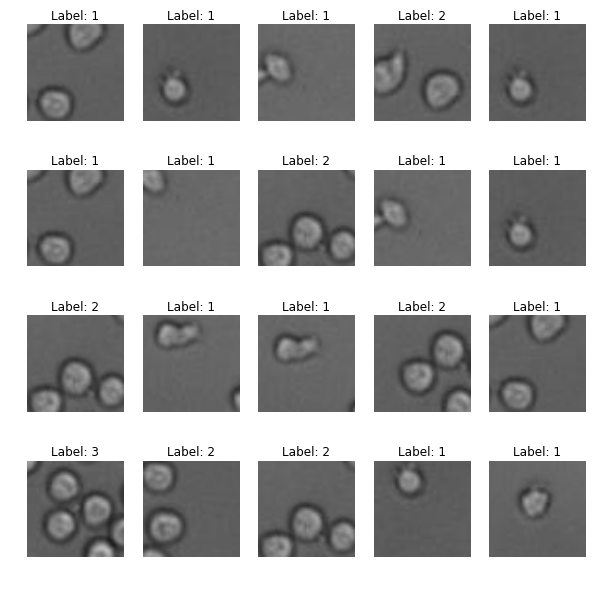

In [24]:
f = pylab.figure()
pylab.rcParams['figure.figsize'] = (10,10)


# for i in range(20):
#     f.add_subplot(4,5,i+1)
#     j = random.randint(0,len(labelOneCount))
#     pylab.imshow(well.crop(labelOneBound[j]))
#     pylab.title("Count: "+str(labelOneCount[j]))
pylab.axis('off')
    
for i in range(20):
    f.add_subplot(4,5,i+1)
    j = random.randint(0,len(labelOneCount))
    pylab.imshow(well.crop(labelOneBound[j]))
    pylab.title("Label: "+str(labelOneCount[j]))
    plt.axis('off')
    if(i<1):
        plt.axis('off')
        fig = pylab.gcf()
        fig.savefig('./data/save/split1.png',bbox_inches='tight')
    
    
    
# wellfig = plt.imshow(well)
# wellfig.set_cmap('hot')
# plt.axis('off')
plt.axis('off')
fig = pylab.gcf()

fig.savefig('./data/save/split.png',bbox_inches='tight')
    


## Test by single Logistic Model

In [8]:
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
start = time()
def logisticRegressionCV(Data,Label):
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(Data,Label)
    scores = cross_val_score(logreg,Data,Label, cv=3)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return logreg


logreg = logisticRegressionCV(trainSetData,trainSetLabel)

print()
print('Finish running in {:.2f} seconds.'.format(time()-start))

NameError: name 'trainSetData' is not defined

In [8]:
strat = time()
def logisticRegressionSplit(Data,Label):
    print()
    print('Logistic Regression Model')
    X_train, X_test, y_train, y_test = train_test_split(Data,Label, test_size=0.2, random_state=0)
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X_train,y_train)
    y_predicted = logreg.predict(X_test)
    print(metrics.classification_report(y_test, y_predicted))
    print ("Confusion matrix")
    print (metrics.confusion_matrix(y_test, y_predicted))
    score = logreg.score(X_test,y_test)
    print("Accuracy: %0.2f" % (score))
    print('- Best parameters after grid search: ')
    return logreg,score


logreg = logisticRegressionSplit(trainSetData,trainSetLabel)
print()
print('Finish running in {:.2f} seconds.'.format(time()-start))



Logistic Regression Model
             precision    recall  f1-score   support

          0       0.53      0.67      0.59        12
          1       0.20      0.12      0.15         8

avg / total       0.40      0.45      0.42        20

Confusion matrix
[[8 4]
 [7 1]]
Accuracy: 0.45
- Best parameters after grid search: 

Finish running in 8.61 seconds.


In [17]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt



def SimplelinearRegression(DataInput,LabelInput,number,switch):
    start = time()
    regr = linear_model.LinearRegression()
    if(switch==True):
        Data,trainSetLabel,Label,labelOneCount,labelOneBound,allBound = generateTrainSetBalanced(entirePath,boudaryPath,detPath,50,50,5,20,10)
         
    else:
        Data = DataInput.reshape(1, -1)
        Label = LabelInput
    X_train, X_test, y_train, y_test = train_test_split(Data,Label, test_size=0.2, random_state=0)
    regr.fit(X_train, y_train)
    print(regr.predict(X_test))
    print(y_test)
    print('Coefficients: \n', regr.coef_)
# The mean square error
    print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))
    print('Finish running in {:.2f} seconds.'.format(time()-start))
    plt.scatter(regr.predict(X_test), y_test)      
#     plt.xticks(())
#     plt.yticks(())
    plt.show()
    
    
    
print('finish')

finish


./data/train/entireImage/a1.jpeg
Generate balanced train set.
100 in 200 has label.
[ 0.19131627  0.18193529 -0.4412253   0.0354495   0.03450142 -0.11817736
  0.92612341  0.02219369  0.97930417 -0.0090474  -0.06059189  1.56705647
 -0.08176338  0.74069197 -0.22917692  0.14010378 -1.10483289 -0.19515265
  2.01022202  0.35878406  0.16044342  0.07748983  1.11037253 -0.9523434
 -0.18724292  0.02642586  0.40375114 -0.27032149 -0.03850855  0.11978655
  0.89842806  1.07898582  0.04797592 -0.24795231 -0.32133606  0.08828169
 -0.12187448 -0.63840179 -0.24757673  0.07926839]
[2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 4, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0]
Coefficients: 
 [ -7.67736806e-09  -8.74327994e-09   2.79915822e-09 ...,   1.22580061e-09
   3.61062029e-09   8.16951986e-09]
Residual sum of squares: 0.88
Variance score: -0.04
Finish running in 13.29 seconds.


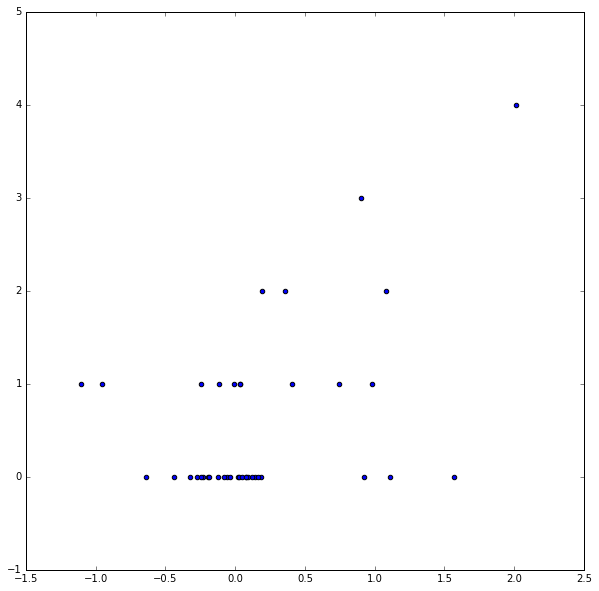

In [18]:

SimplelinearRegression(None,None,1000,True)

## ----------------------------
## Building CNN Model

In [25]:
import os
import sys
import numpy
import theano
import theano.tensor as T
from theano.tensor.nnet import conv
from theano.tensor.signal import downsample
from sklearn.metrics import mean_squared_error

/Users/jizhizili/anaconda/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Residual sum of squares: 2.69
Variance score: -2.21
Finish running in 1.04 seconds.


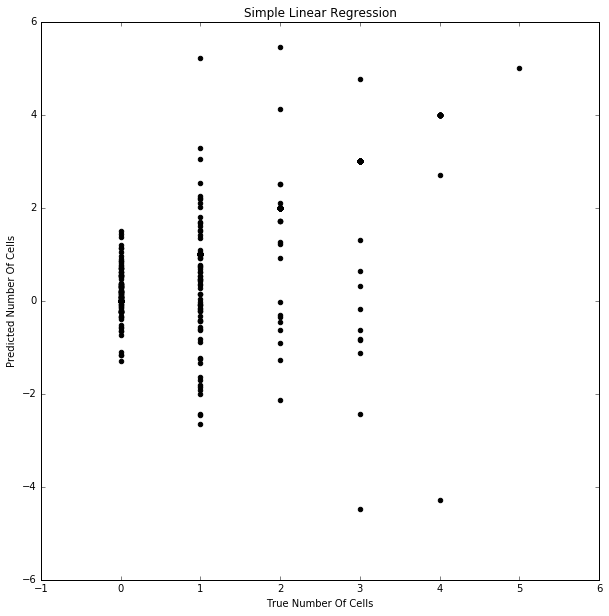

MSE:
0.538384199127
RMSE:
0.7337466859393987
PEARSON:
(0.76816898442121606, 1.7842913528394224e-195)


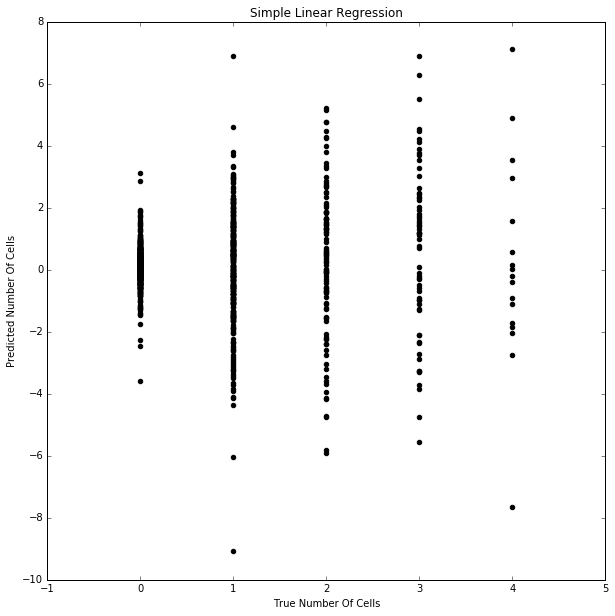

MSE:
3.59138272213
RMSE:
1.8950943834357366
PEARSON:
(0.064369699435685074, 0.041839448246540262)


In [35]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from pydoc import help
from scipy.stats.stats import pearsonr
from math import sqrt

    
def ScatterFig(predict,true,number,title):
    pylab.rcParams['figure.figsize'] = (10.0,10.0)
    img = plt.scatter(true,predict,  color='black')    
    plt.ylabel('Predicted Number Of Cells')
    plt.xlabel('True Number Of Cells')
    plt.title(title)
    plt.axis('on')
    fig = plt.gcf()

    fig.savefig('./resultFig/image'+str(number)+'.png',dpi=100)
    plt.show(img)
    print('MSE:')
    print(mean_squared_error(predict,true))
    print('RMSE:')
    print(sqrt(mean_squared_error(predict,true)))
    
    print('PEARSON:')
    print(pearsonr(true,predict))
    
    
def SimplelinearRegression(DataInput,LabelInput,number,switch):
    start = time()
    regr = linear_model.LinearRegression()
    if(switch==True):
        Data,trainSetLabel,Label,labelOneCount,labelOneBound,allBound = generateTrainSetBalanced(entirePath,boudaryPath,detPath,50,50,5,10,100)
         
    else:
        Data = DataInput
        Label = LabelInput
    X_train, X_test, y_train, y_test = train_test_split(Data,Label, test_size=0.2, random_state=0)
    regr.fit(X_train, y_train)
#     print('Coefficients: \n', regr.coef_)
# The mean square error
    print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))
    print('Finish running in {:.2f} seconds.'.format(time()-start))
    return regr

    
    
regr = SimplelinearRegression(trainSetData,trainSetCountLabel,1000,False)

ScatterFig(regr.predict(trainSetData),trainSetCountLabel,1,'Simple Linear Regression')
ScatterFig(regr.predict(testSetData),testSetCountLabel,2,'Simple Linear Regression')


In [68]:
start = time()

def load_data(Data,Label):
    train_data_list,test_data_valid, train_label_list, test_label_valid = train_test_split(Data,Label, test_size=0.2, random_state=0)
    
    test_data_list,valid_data_list,test_label_list,valid_label_list= train_test_split(test_data_valid,test_label_valid,test_size=0.5,random_state=0)
    train_data = numpy.array(train_data_list)
    train_label = numpy.array(train_label_list)
    valid_data = numpy.array(valid_data_list)
    valid_label = numpy.array(valid_label_list)
    test_data = numpy.array(test_data_list)
    test_label = numpy.array(test_label_list)
    # Data stored as shared type so that they can be copied to GPU and get speed increased.
    def shared_dataset(data_x, data_y, borrow=True):
        shared_x = theano.shared(numpy.asarray(data_x,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        shared_y = theano.shared(numpy.asarray(data_y,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        return shared_x, T.cast(shared_y, 'int32')

    train_set_x, train_set_y = shared_dataset(train_data,train_label)
    test_set_x, test_set_y = shared_dataset(test_data,test_label)
    valid_set_x, valid_set_y = shared_dataset(valid_data,valid_label)
    rval = [(train_set_x, train_set_y),(valid_set_x, valid_set_y),(test_set_x, test_set_y)]
    return rval



#Classifier, the last layer of CNN, softmax used
class LogisticRegression(object):
    def __init__(self, input, n_in, n_out):
        self.W = theano.shared(
            value=numpy.zeros(
                (n_in, n_out),
                dtype=theano.config.floatX
            ),
            name='W',
            borrow=True
        )
        self.b = theano.shared(
            value=numpy.zeros(
                (n_out,),
                dtype=theano.config.floatX
            ),
            name='b',
            borrow=True
        )
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        self.params = [self.W, self.b]

    def negative_log_likelihood(self, y):
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])

    def errors(self, y):
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        if y.dtype.startswith('int'):
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()


#Classifier, the last layer of CNN, softmax used
class LinearRegression(object):
    def __init__(self, input, n_in, n_out):
        self.W = theano.shared(
            value=numpy.zeros(
                (n_in, n_out),
                dtype=theano.config.floatX
            ),
            name='W',
            borrow=True
        )

        self.b = theano.shared(
            value=numpy.zeros(
                (n_out,),
                dtype=theano.config.floatX
            ),
            name='b',
            borrow=True
        )

        self.p_y_given_x = T.dot(input, self.W) + self.b
#         self.y_pred = T.argmax(self.p_y_given_x, axis=1)
#         self.y_pred=T.dot(input, self.W) + self.b
        self.y_pred = self.p_y_given_x[:,0]
        self.params = [self.W, self.b]     

    def linear_likelihood(self, y,number):
#         return T.square(y-self.y_pred)
        return T.sum(T.pow(self.y_pred-y,2))/(2*number)
        return T.sum(T.pow(self.y_pred-y,2))

    def errors(self, y):
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        if y.dtype.startswith('int'):
#             return T.mean(T.neq(self.y_pred, y))
#             return T.sum(T.sqr(y-self.y_pred),axis=1)
#             return T.sum(T.sqr(y-self.y_pred))
#             return T.sum(T.pow(self.y_pred-y,2))
            return T.sum(T.pow(self.y_pred-y,2))
#             return mean_squared_error(self.y_pred, y)

        else:
            raise NotImplementedError()

#Full-connected layer, the layer before classifier
class HiddenLayer(object):
    def __init__(self, rng, input, n_in, n_out, W=None, b=None,
                 activation=T.tanh):

        self.input = input

        if W is None:
            W_values = numpy.asarray(
                rng.uniform(
                    low=-numpy.sqrt(6. / (n_in + n_out)),
                    high=numpy.sqrt(6. / (n_in + n_out)),
                    size=(n_in, n_out)
                ),
                dtype=theano.config.floatX
            )
            if activation == theano.tensor.nnet.sigmoid:
                W_values *= 4
            W = theano.shared(value=W_values, name='W', borrow=True)

        if b is None:
            b_values = numpy.zeros((n_out,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b', borrow=True)

        self.W = W
        self.b = b

        lin_output = T.dot(input, self.W) + self.b
        self.output = (
            lin_output if activation is None
            else activation(lin_output)
        )
        # parameters of the model
        self.params = [self.W, self.b]


#Convolutional layer + max-pooling layer
class LeNetConvPoolLayer(object):

    def __init__(self, rng, input, filter_shape, image_shape, poolsize=(2, 2)):

        assert image_shape[1] == filter_shape[1]
        self.input = input

        fan_in = numpy.prod(filter_shape[1:])
        fan_out = (filter_shape[0] * numpy.prod(filter_shape[2:]) /
                   numpy.prod(poolsize))

        # initialize weights with random weights
        W_bound = numpy.sqrt(6. / (fan_in + fan_out))
        self.W = theano.shared(
            numpy.asarray(
                rng.uniform(low=-W_bound, high=W_bound, size=filter_shape),
                dtype=theano.config.floatX
            ),
            borrow=True
        )

        # the bias is a 1D tensor -- one bias per output feature map
        b_values = numpy.zeros((filter_shape[0],), dtype=theano.config.floatX)
        self.b = theano.shared(value=b_values, borrow=True)

        # Convolutional
        conv_out = conv.conv2d(
            input=input,
            filters=self.W,
            filter_shape=filter_shape,
            image_shape=image_shape
        )

        # Max-pooling
        pooled_out = downsample.max_pool_2d(
            input=conv_out,
            ds=poolsize,
            ignore_border=True
        )

        self.output = T.tanh(pooled_out + self.b.dimshuffle('x', 0, 'x', 'x'))

        # store parameters of this layer
        self.params = [self.W, self.b]


#Save the parameters from training
def save_params(param_path,param1,param2,param3,param4):  
        import pickle  
        write_file = open(param_path, 'wb')   
        pickle.dump(param1, write_file, -1)
        pickle.dump(param2, write_file, -1)
        pickle.dump(param3, write_file, -1)
        pickle.dump(param4, write_file, -1)
        write_file.close()  

        
print('finish')

def train_CNN(width,height,patience,choice,number,cellNumber,learningRate):  
  
    fullyOutputNumber = 1000
    n_epochs=200
    # nkerns: number of kernels in each layer
    nkerns=[5,10]
#settinghere

    layer1_conv = 5
    layer2_conv = 5
    
    batch_size=40
     
    #Initial parameter
    rng = numpy.random.RandomState(23455)
    #Load data
    if(choice=='logistic_zeroOne'):
        datasets = load_data(trainSetData,trainSetLabel)
        learning_rate=learningRate
    elif(choice=='logistic_count'):
        datasets = load_data(trainSetData,trainSetCountLabel)
        learning_rate=learningRate
    elif(choice=='linear_count'):
        datasets = load_data(trainSetData,trainSetCountLabel)
        learning_rate=learningRate

    
    
    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    #Calculate batch_size for each data set
    n_train_batches = train_set_x.get_value(borrow=True).shape[0]
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
    n_test_batches = test_set_x.get_value(borrow=True).shape[0]
    n_train_batches /= batch_size
    n_valid_batches /= batch_size
    n_test_batches /= batch_size

    #Define several variables, x as train data, as the input of layer0
    index = T.lscalar()
    x = T.matrix('x')  
    y = T.ivector('y')



    ######################
    #Build CNN Model:
    #input+layer0(LeNetConvPoolLayer)+layer1(LeNetConvPoolLayer)+layer2(HiddenLayer)+layer3(LogisticRegression)
    ######################
    print ('...building')



    # Reshape matrix of rasterized images of shape (batch_size, 50*50)
    # to a 4D tensor, compatible with our LeNetConvPoolLayer
    # (50,50) is the size of  images.
    layer0_input = x.reshape((batch_size, 1, width, height))

    # The first convolutional_maxpooling layer
    # Size after convolutional: (50-5+1 , 50-5+1) = (46, 46)
    # Size after maxpooling: (46/2, 46/2) = (23, 23), ignore the boundary
    # 4D output tensor is thus of shape (batch_size, nkerns[0], 23, 23)
    layer0 = LeNetConvPoolLayer(
        rng,
        input=layer0_input,
        image_shape=(batch_size, 1, width, height),
        filter_shape=(nkerns[0], 1, layer1_conv, layer1_conv),
        poolsize=(2, 2)
    )

    # Second convolutional + maxpooling layer, use last layer's output as input, (batch_size, nkerns[0], 23, 23)
    # 
    # Size after convolutional: (23-5+1 , 23-5+1) = (19, 19)
    # Size after maxpooling: (19/2, 19/2) = (9,9), ignore the boundary
    #todo: /2 problem
    # 4D output tensor is thus of shape (batch_size, nkerns[1], 9,9)
    
    
# [1]   
    width1 = math.floor((width-layer1_conv+1)/2)
    height1 = width1
    
    layer1 = LeNetConvPoolLayer(
        rng,
        input=layer0.output,
        image_shape=(batch_size, nkerns[0], width1,height1),
        filter_shape=(nkerns[1], nkerns[0], layer2_conv,layer2_conv),
        poolsize=(2, 2)
    )
    
    hiddenlayerSize = math.floor((width1-layer2_conv+1)/2)
    
    



    #HiddenLayer full-connected layer, the size of input is (batch_size,num_pixels), so each sample will get a one-dimentional vector after layer0 and layer1
    #Output from last layer (batch_size, nkerns[1], 9,9) can be turned to (batch_size,nkerns[1]*9*9), by flatten

# [2]  
    layer2_input = layer1.output.flatten(2)

    layer2 = HiddenLayer(
        rng,
        input=layer2_input,
#[2]
        n_in=nkerns[1] * hiddenlayerSize*hiddenlayerSize,
        n_out=fullyOutputNumber,      #output number of full-connected layer, defined, can change
        activation=T.tanh
    )

 
    #Classifier Layer
    ###############
    # Define some basic factors in optimization, cost function, train, validation, test model, updating rules(Gradient Descent)
    ###############
    # Cost Function
 
    if(choice=='logistic_zeroOne'):
        layer3 = LogisticRegression(input=layer2.output, n_in=fullyOutputNumber, n_out=2)#n_in equals to the output number of full-connected layer，n_out equals to number of classifications.
        cost = layer3.negative_log_likelihood(y)
    elif(choice=='logistic_count'):
        layer3 = LogisticRegression(input=layer2.output, n_in=fullyOutputNumber, n_out=cellNumber+1) 
        cost = layer3.negative_log_likelihood(y)
    elif(choice=='linear_count'):
        layer3 = LinearRegression(input=layer2.output, n_in=fullyOutputNumber, n_out=1)  
        cost = layer3.errors(y)
        #         cost = layer3.linear_likelihood(y,number)
    
    
    
    test_model = theano.function(
        [index],
        layer3.errors(y),
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        [index],
        layer3.errors(y),
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    # All parameters
    # [3]
    params = layer3.params + layer2.params + layer1.params + layer0.params
#     params = layer3.params + layer2.params+layer4.params + layer1.params + layer0.params



    # Gradient of each parameter
    grads = T.grad(cost, params)
    # Updating rules
    updates = [
        (param_i, param_i - learning_rate * grad_i)
        for param_i, grad_i in zip(params, grads)
    ]
    
    
    train_model = theano.function(
    [index],
        #[4]
    [cost,layer3.p_y_given_x, layer3.W, layer3.b, layer3.y_pred, layer2_input, layer2.output, y],
    updates=updates,
    givens={
        x: train_set_x[index * batch_size: (index + 1) * batch_size],
        y: train_set_y[index * batch_size: (index + 1) * batch_size]
    }
    )
    
    


    ###############
    # Train CNN to find the best parameter
    ###############
    print ('...training')
    patience_increase = 2  
    improvement_threshold = 0.99  
    validation_frequency = min(n_train_batches, patience / 2) 
    
    best_validation_loss = numpy.inf
    best_iter = 0
    test_score = 0.
    start_time = time

    epoch = 0
    done_looping = False

    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(math.floor(n_train_batches)):

            iter = (epoch - 1) * n_train_batches + minibatch_index

            if iter % 100 == 0:
                print ('training @ iter = ', iter)
            cost_ij = train_model(minibatch_index)
            
            if (iter + 1) % validation_frequency == 0:

                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i
                                     in range(math.floor(n_valid_batches))]
                this_validation_loss = numpy.mean(validation_losses)
                print('epoch %i, minibatch %i/%i, validation error %f %%' %
                      (epoch, minibatch_index + 1, n_train_batches,
                       this_validation_loss * 100.))

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:

                    #improve patience if loss improvement is good enough
                    if this_validation_loss < best_validation_loss *  \
                       improvement_threshold:
                        patience = max(patience, iter * patience_increase)

                    # save best validation score and iteration number
                    best_validation_loss = this_validation_loss
                    best_iter = iter
                    # test it on the test set
                    test_losses = [
                        test_model(i)
                        for i in range(math.floor(n_test_batches))
                    ]
                    test_score = numpy.mean(test_losses)
                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                           test_score * 100.))
           
            if(choice=='logistic_zeroOne'):
                save_params('./params/logistic_zeroOne_params.pkl',layer0.params,layer1.params,layer2.params,layer3.params)#save parameter
            elif(choice=='logistic_count'):
                save_params('./params/logistic_count_params.pkl',layer0.params,layer1.params,layer2.params,layer3.params)#save parameter
            elif(choice=='linear_count'):
                #[5]
                save_params('./params/linear_count_params.pkl',layer0.params,layer1.params,layer2.params,layer3.params)#save parameter
#                 save_params('./params/linear_count_params.pkl',layer0.params,layer1.params,layer4.params,layer2.params,layer3.params)#save parameter



            if patience <= iter:
                done_looping = True
                break

    
    print('Optimization complete.')
    print('Best validation score of %f %% obtained at iteration %i, '
          'with test performance %f %%' %
          (best_validation_loss * 100., best_iter + 1, test_score * 100.))
   

finish


In [216]:
# trainSetData,trainSetLabel,trainSetCountLabel,labelOneCount,labelOneBound,allBound = generateTrainSetBalanced(entirePath,boudaryPath,detPath,50,50,5,20,[1,50])
print()

In [27]:
testSetData,testSetLabel,trainSetCountLabel,labelOneCount,labelOneBound,allBound = generateTrainSetBalanced(entirePath,boudaryPath,detPath,50,50,5,20,[1,50])


KeyboardInterrupt: 

In [30]:
[trainSetData,trainSetCountLabel] = load_paramsList('./params/trainList.pkl')
[testSetData,testSetCountLabel] = load_paramsList('./params/testList.pkl')

## simple Linear Regression

## Linear - count

In [71]:
start = time()

train_CNN(50,50,5000,'linear_count',1000,16,0.00001)
print()
print('Finish running in {:.2f} seconds.'.format(time()-start))

## Linear - count 

...building
...training
training @ iter =  0.0
epoch 1, minibatch 20/20, validation error 2826.955282 %
     epoch 1, minibatch 20/20, test error of best model 2014.320698 %
epoch 2, minibatch 20/20, validation error 3131.237316 %
epoch 3, minibatch 20/20, validation error 2824.626665 %
     epoch 3, minibatch 20/20, test error of best model 1930.508024 %
epoch 4, minibatch 20/20, validation error 2679.831104 %
     epoch 4, minibatch 20/20, test error of best model 1821.584321 %
epoch 5, minibatch 20/20, validation error 2604.811086 %
     epoch 5, minibatch 20/20, test error of best model 1763.021256 %
training @ iter =  100.0
epoch 6, minibatch 20/20, validation error 2567.677413 %
     epoch 6, minibatch 20/20, test error of best model 1733.545444 %
epoch 7, minibatch 20/20, validation error 2558.611968 %
     epoch 7, minibatch 20/20, test error of best model 1725.124940 %
epoch 8, minibatch 20/20, validation error 2568.277201 %
epoch 9, minibatch 20/20, validation error 2581.0444

In [72]:
import os
import sys
import pickle

import numpy
from PIL import Image

import theano
import theano.tensor as T
from theano.tensor.nnet import conv
from theano.tensor.signal import downsample
import math

# [1]
def load_params(params_file):
    f=open(params_file,'rb')
    layer0_params=pickle.load(f)
    layer1_params=pickle.load(f)
    layer2_params=pickle.load(f)
    layer3_params=pickle.load(f)
    f.close()
    return layer0_params,layer1_params,layer2_params,layer3_params

def load_data(Data,Label):

    test_data = numpy.array(Data)
    test_label = numpy.array(Label)
    return test_data,test_label


class LogisticRegression(object):
    def __init__(self, input, params_W,params_b,n_in, n_out):
        self.W = params_W
        self.b = params_b
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        self.params = [self.W, self.b]

    def negative_log_likelihood(self, y):
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])

    def errors(self, y):
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        if y.dtype.startswith('int'):
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()
            
            
            
class LinearRegression(object):
    def __init__(self, input, params_W,params_b,n_in, n_out):
        self.W = params_W
        self.b = params_b
        self.p_y_given_x = T.dot(input, self.W) + self.b
        self.y_pred = self.p_y_given_x[:,0]
#         self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        self.params = [self.W, self.b]

    def linear_likelihood(self, y,number):
#         return T.square(y-self.y_pred)
        return T.sum(T.pow(self.y_pred-y,2))/(2*number)

    def errors(self, y):
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        if y.dtype.startswith('int'):
            return T.sum(T.pow(self.y_pred-y,2))
#             return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()


class HiddenLayer(object):
    def __init__(self, input, params_W,params_b, n_in, n_out,
                 activation=T.tanh):
        self.input = input
        self.W = params_W
        self.b = params_b

        lin_output = T.dot(input, self.W) + self.b
        self.output = (
            lin_output if activation is None
            else activation(lin_output)
        )
        self.params = [self.W, self.b]

	
#卷积+采样层（conv+maxpooling）
class LeNetConvPoolLayer(object):
    def __init__(self,  input,params_W,params_b, filter_shape, image_shape, poolsize=(2, 2)):
        assert image_shape[1] == filter_shape[1]
        self.input = input
        self.W = params_W
        self.b = params_b
        # 卷积
        conv_out = conv.conv2d(
            input=input,
            filters=self.W,
            filter_shape=filter_shape,
            image_shape=image_shape
        )
        # 子采样
        pooled_out = downsample.max_pool_2d(
            input=conv_out,
            ds=poolsize,
            ignore_border=True
        )
        self.output = T.tanh(pooled_out + self.b.dimshuffle('x', 0, 'x', 'x'))
        self.params = [self.W, self.b]

import matplotlib.pyplot as plt
%matplotlib inline 
def use_CNN(dataSet,labelSet,params_file,choice,printSwitch):   


#     nkerns=[10, 20]
    #load data
    # faces,label=load_data(dataset)
    data,label = load_data(dataSet,labelSet)
    data_num = data.shape[0]   #how many data
  
    #load parameter
    #[2]
    layer0_params,layer1_params,layer2_params,layer3_params=load_params(params_file)
#     layer0_params,layer1_params,layer4_params,layer2_params,layer3_params=load_params(params_file)



    
    x = T.matrix('x')  #用变量x表示输入的人脸数据，作为layer0的输入

    ######################
    #用读进来的参数初始化各层参数W、b
    ######################
    
    width = 50
    height =50
    #settinghere
    nkerns=[5, 10]
    fullyOutputNumber = 1000

    layer1_conv = 5
    layer2_conv = 5
    
    layer0_input = x.reshape((data_num, 1, width,height)) 
    layer0 = LeNetConvPoolLayer(
        input=layer0_input,
        params_W=layer0_params[0],
        params_b=layer0_params[1],
        image_shape=(data_num, 1, width,height),
        filter_shape=(nkerns[0], 1, layer1_conv,layer1_conv),
        poolsize=(2, 2)
    )

    width1 = math.floor((width-layer1_conv+1)/2)
    
    #[3]
    layer1 = LeNetConvPoolLayer(
        input=layer0.output,
        params_W=layer1_params[0],
        params_b=layer1_params[1],
        image_shape=(data_num, nkerns[0], width1,width1),
        filter_shape=(nkerns[1], nkerns[0], layer2_conv, layer2_conv),
        poolsize=(2, 2)
    )
    
    layer2_input = layer1.output.flatten(2)

    width2 = math.floor((width1-layer2_conv+1)/2)
        
    layer2 = HiddenLayer(
        input=layer2_input,
        params_W=layer2_params[0],
        params_b=layer2_params[1],
        #[3]
        n_in=nkerns[1] * width2 * width2,
        n_out= fullyOutputNumber,      
        activation=T.tanh
    )

    if(choice=='logistic_zeroOne'):
        layer3 = LogisticRegression(input=layer2.output, params_W=layer3_params[0],params_b=layer3_params[1],n_in= fullyOutputNumber, n_out=2)
    elif(choice=='logistic_count'):
        layer3 = LogisticRegression(input=layer2.output, params_W=layer3_params[0],params_b=layer3_params[1],n_in=fullyOutputNumber, n_out=16)
    elif(choice=="linear_count"):
        layer3 = LinearRegression(input=layer2.output,params_W=layer3_params[0],params_b=layer3_params[1],n_in=fullyOutputNumber, n_out=1)  

     
     
    #定义theano.function，让x作为输入，layer3.y_pred（即预测的类别）作为输出
    f = theano.function(
        [x],    #funtion 的输入必须是list，即使只有一个输入
        layer3.y_pred
    )
    
    #预测的类别pred
    pred = f(data)

    

    #将预测的类别pred与真正类别label对比，输出错分的图像
    wrongList = []
#     plt.plot(pred,label)

    for i in range(data_num):
        try:
            if(label[i]!=math.floor(pred[i]) or pred[i]==numpy.nan):
                wrongList.append(i)
                if(printSwitch==True):
                    print('picture: %i is %i, mis-predicted as  %i' %(i, label[i], pred[i]))
        except:
            wrongList.append(i)
    print(str(len(wrongList))+" in "+str(len(label))+" has been predicted wrong")
    print("predict accuracy: {:.2f}%".format((len(label)-len(wrongList))/len(label)*100))
    return label, pred, wrongList
        
    
print('finish')


finish


299 in 1000 has been predicted wrong
predict accuracy: 70.10%


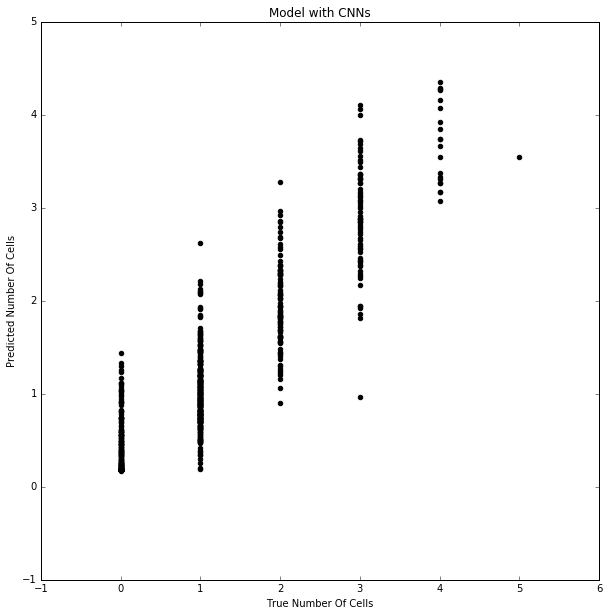

MSE:
0.162477745222
RMSE:
0.4030852828148854
PEARSON:
(0.92570192279266961, 0.0)


In [73]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from pydoc import help
from scipy.stats.stats import pearsonr
y_true,y_pred,wrongID = use_CNN(trainSetData, trainSetCountLabel,'./params/linear_count_params.pkl','linear_count',False)

ScatterFig(y_pred,y_true,3,'Model with CNNs')

# MSE = mean_squared_error(y_true, y_pred)
# print(MSE)
# PEAR = pearsonr(y_true,y_pred)
# print(PEAR)

307 in 1000 has been predicted wrong
predict accuracy: 69.30%


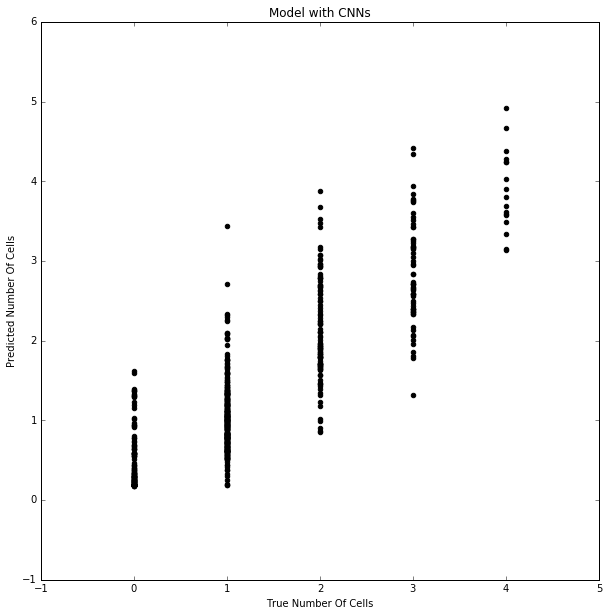

MSE:
0.197772323853
RMSE:
0.44471600359459684
PEARSON:
(0.90665755227939338, 0.0)


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from pydoc import help
from scipy.stats.stats import pearsonr
y_true,y_pred,wrongID = use_CNN(testSetData, testSetCountLabel,'./params/linear_count_params.pkl','linear_count',False)
ScatterFig(y_pred,y_true,4,'Model with CNNs')


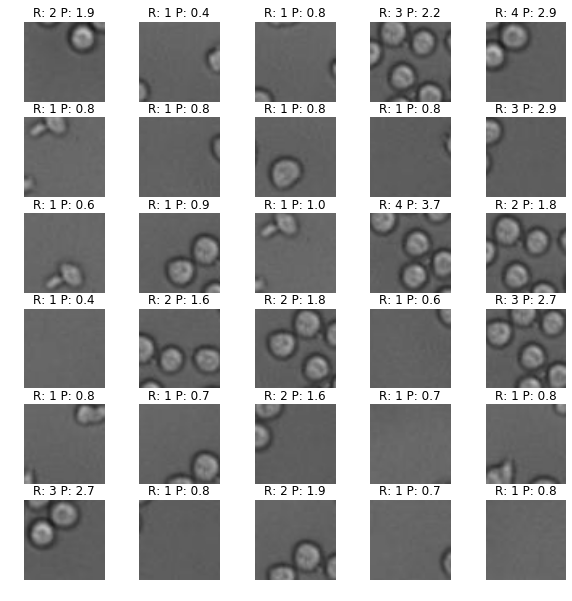

In [69]:
import matplotlib.pyplot as plt
plt.clf()
f = pylab.figure()
pylab.rcParams['figure.figsize'] = (10,10)
count=1
for i in wrongID[150:200]:
    f.add_subplot(6,5,count)
    count= count+1
    pylab.imshow(well.crop(allBound[i]))
    pylab.title("R: "+str(y_true[i])+" P: "+"%.1f" %(y_pred[i]))
    pylab.axis('off')
    if(count>30):
        break
#     left  = 0.2  # the left side of the subplots of the figure
#     right = 0.4  # the right side of the subplots of the figure
#     bottom = 0.3   # the bottom of the subplots of the figure
#     top = 0.5      # the top of the subplots of the figure
#     wspace = 0.2   # the amount of width reserved for blank space between subplots
#     hspace = 0.5  
# 



## Logistic - zero&one

In [43]:
start = time()
train_CNN(50,50,800,'logistic_zeroOne',1000,16,0.005)
print()
print('Finish running in {:.2f} seconds.'.format(time()-start))

...building
...training
training @ iter =  0.0
epoch 1, minibatch 20/20, validation error 46.250000 %
     epoch 1, minibatch 20/20, test error of best model 52.500000 %
epoch 2, minibatch 20/20, validation error 46.250000 %
epoch 3, minibatch 20/20, validation error 46.250000 %
epoch 4, minibatch 20/20, validation error 43.750000 %
     epoch 4, minibatch 20/20, test error of best model 48.750000 %
epoch 5, minibatch 20/20, validation error 42.500000 %
     epoch 5, minibatch 20/20, test error of best model 45.000000 %
training @ iter =  100.0
epoch 6, minibatch 20/20, validation error 42.500000 %
epoch 7, minibatch 20/20, validation error 41.250000 %
     epoch 7, minibatch 20/20, test error of best model 40.000000 %
epoch 8, minibatch 20/20, validation error 35.000000 %
     epoch 8, minibatch 20/20, test error of best model 37.500000 %
epoch 9, minibatch 20/20, validation error 32.500000 %
     epoch 9, minibatch 20/20, test error of best model 35.000000 %
epoch 10, minibatch 20/20

## Discussion

<ul>
<li>have more kernels in one layer<li>
<li>work on linear regression(switch to regression)<li>
<li>generate cell on other background<li>
<li>more balance data with label<li>
<li>compute the exact number of parameter used<li>
<li>add some noice to original data(online)<li>
<li>add more noice to one image to become multiple images<li>
<li>rotate image with small angle<li>

</ul>





- use logistic regression classifier for the count problem: 84% accuracy (16 class)

- use balanced dataset: accuracy decreased

theano.tensor.nnet.conv2d, which is the most common one in almost all of the recent published convolutional models. In this operation, each output feature map is connected to each input feature map by a different 2D filter, and its value is the sum of the individual convolution of all inputs through the corresponding filter.